In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import numpy as np


plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
from IPython.display import display

In [66]:
df = pd.read_csv('data/df_add.csv')
df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000,0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.889044,0.0,0.0,0.001080,1,0:00:01,5.703931,1
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.715488,0.0,0.0,0.002112,2,0:00:02,5.449382,1
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.562560,0.0,0.0,0.003102,3,0:00:03,5.225088,1
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.454028,0.0,0.0,0.004339,4,0:00:04,6.532574,1


# Segments
 ### I want to assign a grade designation by some unit of distance (15 ft?  15 seconds? or consistant grade sticks together whether long or short?)
 
 ### I want to create segments @ natural stopping points (roads/lights/aid stations) where speed is close to 0. 
 ### do segments first, then get rid of the stopped areas (or just label them differently and can sum moving time by count and get "seconds
 ### cycle between moving seg1, stopped segment (i.e. time spent at aid or at light) and then after a stop then seg2 , and so on.

In [67]:
df.tail()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
59635,2021-12-05 04:07:14+00:00,38.575911,-77.412909,38.400002,"(38.57591092586517, -77.41290858015418, 38.400...",0.000567,0.000567,2.039688,0.0,-59.599998,65.805984,59635,16:33:55,2.991542,1
59636,2021-12-05 04:07:15+00:00,38.575905,-77.412903,38.400002,"(38.575905142351985, -77.41290304809809, 38.40...",0.000499,0.000499,1.796292,0.0,-59.599998,65.806483,59636,16:33:56,2.634562,1
59637,2021-12-05 04:07:16+00:00,38.575900,-77.412897,38.400002,"(38.57589961029589, -77.41289709694684, 38.400...",0.000499,0.000499,1.797948,0.0,-59.599998,65.806982,59637,16:33:57,2.636990,1
59638,2021-12-05 04:07:17+00:00,38.575893,-77.412893,38.400002,"(38.57589282095432, -77.41289340890944, 38.400...",0.000509,0.000510,1.834740,0.0,-59.599998,65.807492,59638,16:33:58,2.690952,1
59639,2021-12-05 04:07:18+00:00,38.575885,-77.412891,38.400002,"(38.57588494196534, -77.41289131343365, 38.400...",0.000555,0.000556,2.001708,0.0,-59.599998,65.808048,59639,16:33:59,2.935838,1


In [68]:
full_miles = df['distance'].sum()//1
full_miles

65.0

In [69]:
def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return [lowerneighbour_ind, upperneighbour_ind] 

junder,jover = find_neighbours(1,df,'cum_distance')
df[junder:jover+1]


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
899,2021-12-04 11:46:02+00:00,38.582160,-77.411877,75.800003,"(38.582159550860524, -77.4118766002357, 75.800...",0.001529,0.001530,5.506416,0.000000,-22.199997,0.999362,899,0:14:59,8.076077,1
900,2021-12-04 11:46:03+00:00,38.582178,-77.411893,75.599998,"(38.5821782425046, -77.41189328022301, 75.5999...",0.001579,0.001575,5.668740,-0.200005,-22.400002,1.000937,900,0:15:00,8.314152,1


In [70]:
print(df['cum_distance'][junder]//1)
print(df['cum_distance'][jover]//1)


0.0
1.0


In [71]:
# add mile indicators -stance?
def make_miles(row):
    return row['cum_distance']//1 +1
df['mile_num'] = df.apply(make_miles, axis=1)
df['mile_num'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66.])

In [72]:
df[df['mile_num'] == 9]['second'].count()

797

In [73]:
# time_by_mile
def mile_time(mile):
    seconds = int(df[df['mile_num'] == mile]['second'].count())
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
mile_time(1)

'0:15:00'

In [74]:

def run_miles(df):
    mile_analysis=[]        
    for i in df['mile_num'].unique():
        if i == 0:
            continue
        else:
            mile_analysis.append(mile_time(i))
    return mile_analysis
    

In [75]:
def mile_marker_loc(df):
    mile_markers = []

    for i in range(1,len(df['mile_num'].unique())):
        junder,jover  = find_neighbours(i, df, 'cum_distance')
        mile_markers.append(jover)
    return mile_markers

In [76]:
def section_distance(df,unit):
    return df['cum_distance']//unit +1

df['grade_section'] = df.apply(section_distance,unit=.1, axis=1)


In [77]:
def grade_marker_loc(df):
    grade_markers = []
    for i in range(1,len(df['grade_section'].unique())):
        junder,jover  = find_neighbours(i/10, df, 'cum_distance')
        grade_markers.append(jover)
    return grade_markers



In [79]:
unit = 0.1
prev = df['elevation'][0]
conversion_factor = 0.62137119
gradient =[]

for i in range(len(df['grade_section'].unique())):
    el_diff = df['elevation'][i] - prev
    unit_gradient = el_diff/(unit/conversion_factor*1000)
    gradient.append(unit_gradient)
    prev = df['elevation'][i]

gradient[0:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0012427234172562526,
 0.0012427708241156646,
 0.0,
 0.0012427234172561641,
 0.0]

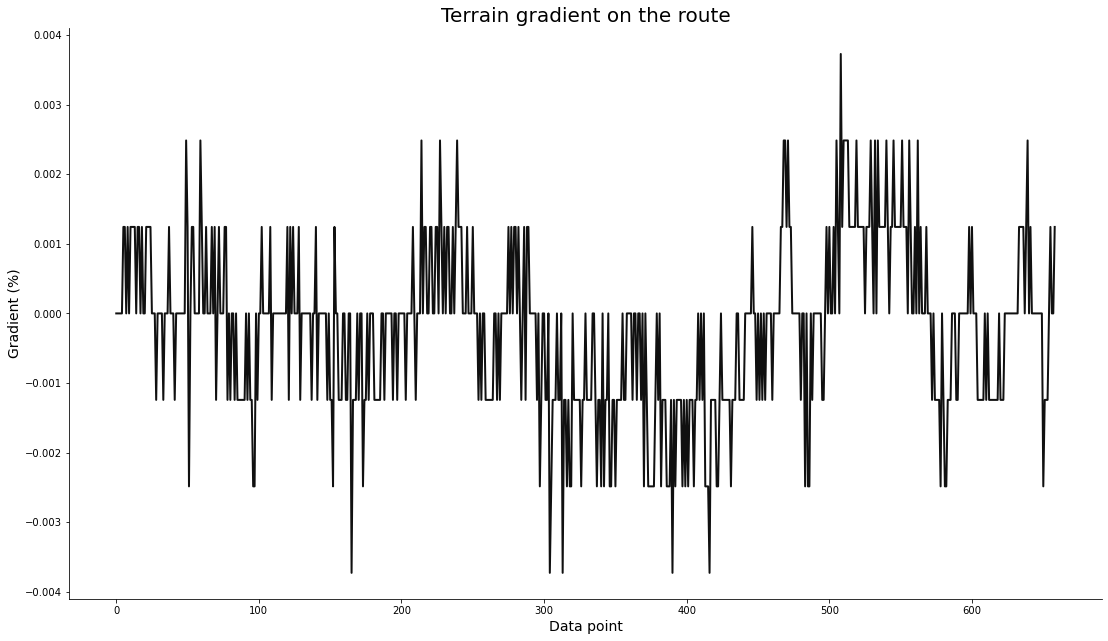

In [80]:


plt.figure(figsize=(18.5, 10.5))
plt.title('Terrain gradient on the route', size=20)
plt.xlabel('Data point', size=14)
plt.ylabel('Gradient (%)', size=14)
plt.plot(np.arange(len(gradient)), gradient, lw=2, color='#101010');

In [62]:
mile_marker_loc(df)

[900,
 1665,
 2457,
 3151,
 3888,
 4683,
 5373,
 6078,
 6875,
 7522,
 8228,
 9039,
 9721,
 10505,
 11201,
 11967,
 12812,
 13518,
 14342,
 15237,
 16116,
 17107,
 18023,
 19382,
 20356,
 21237,
 22096,
 22972,
 24002,
 24793,
 25529,
 26337,
 27242,
 28096,
 28964,
 29833,
 30692,
 31675,
 32465,
 33348,
 34327,
 35263,
 36226,
 37155,
 38556,
 39549,
 40572,
 41503,
 42540,
 43491,
 44496,
 45326,
 46289,
 47347,
 48286,
 49304,
 50271,
 51226,
 52294,
 53367,
 54313,
 55340,
 56420,
 57501,
 58651]

In [81]:
from folium.features import DivIcon

def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(150,36),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html="""<span class="fa-stack " style="font-size: 12pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {:02d}  
                    </strong>
                </span>""".format(color,number)
        )
    return icon
    
col_hex = ['#440154',
 '#481a6c',
 '#472f7d',
 '#414487',
 '#39568c',
 '#31688e',
 '#2a788e',
 '#23888e',
 '#1f988b',
 '#22a884',
 '#35b779',
 '#54c568',
 '#7ad151',
 '#a5db36',
 '#d2e21b'
 ]

In [99]:
lat_map = df['latitude'].mean()
lon_map = df['longitude'].mean()
route_map = folium.Map(
    location=[lat_map, lon_map],
    zoom_start=14,
    tiles='OpenStreetMap',
    width= 1000,
    height=800
)
coordinates = [tuple(x) for x in df[['latitude','longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

locations_to_chart = mile_marker_loc(df)
mile_times = run_miles(df)
num =0
mile=1

for i in locations_to_chart:
    mile_hex = mile//15+1
    loc = [df['latitude'][i], df['longitude'][i]]
    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile),
        icon=folium.Icon(color='white',icon_color='white'),
        markerColor=col_hex[mile_hex]
    ).add_to(route_map)

    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile)+ " "+ mile_times[mile-1],
        icon= number_DivIcon(col_hex[mile_hex],mile)
    ).add_to(route_map)
    mile+=1



display(route_map)

In [89]:
16//15+1

2

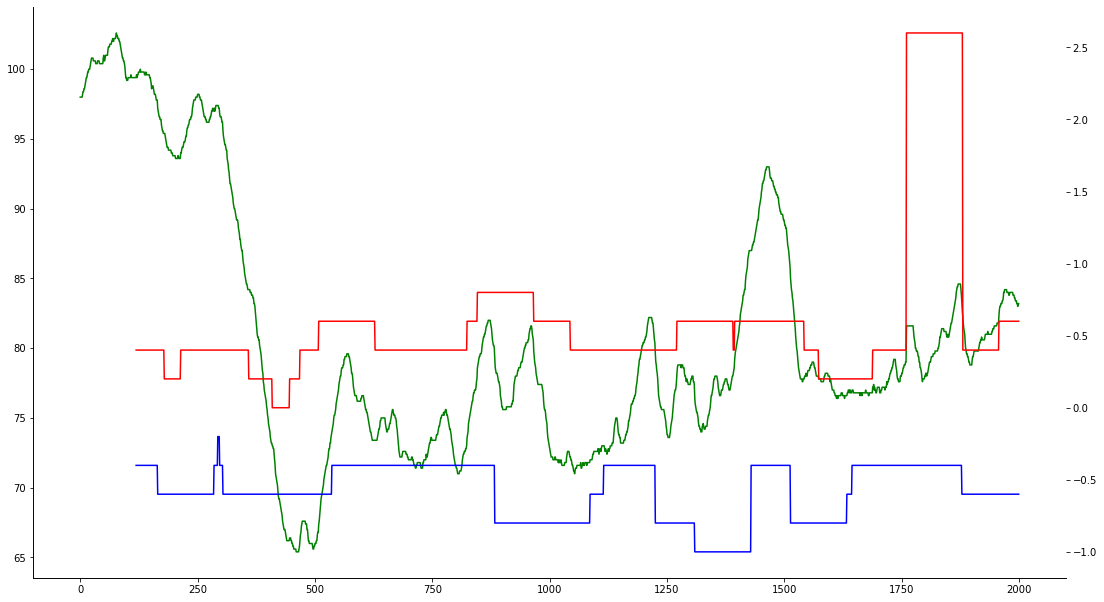

In [ ]:
# Experiment with mean max and min on rolling elevation change
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).max()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).min()[0:2000], c='b')



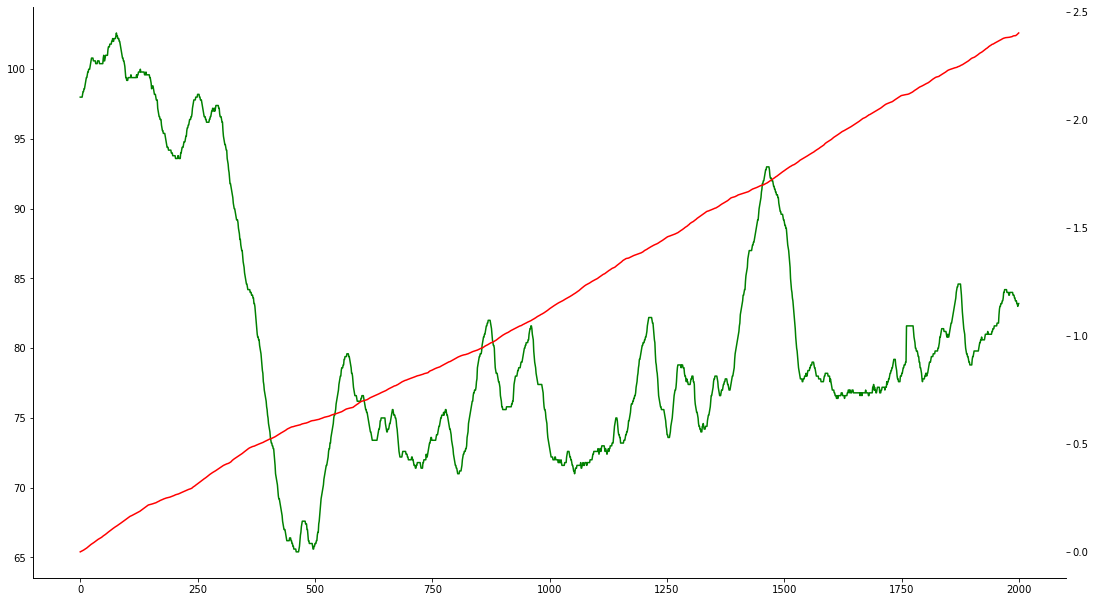

In [ ]:
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['cum_distance'][0:2000], c='r')

In [46]:
df.to_csv('data/df_mile.csv', index=False)
df.describe()

,latitude,longitude,elevation,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,second,step_feet,moving_time,mile_num,grade_section
count,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000
mean,38.580718,-77.379950,45.231207,0.001130,0.001094,3.992858,-0.000999,-52.768793,34.489373,29819.500000,5.777610,0.965711,34.995154,345.397200
std,0.012729,0.025952,36.452463,0.000702,0.000463,1.640442,0.165107,36.452463,18.852400,17216.729364,2.445391,0.181972,18.844257,188.518649
min,38.557794,-77.424799,-27.200001,0.000000,0.000000,0.000000,-1.199997,-125.200001,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,38.571374,-77.406517,19.400000,0.000807,0.000793,2.903022,0.000000,-78.600000,19.196161,14909.750000,4.185324,1.000000,20.000000,192.000000
50%,38.576993,-77.375818,43.400002,0.001093,0.001082,3.930373,0.000000,-54.599998,35.489471,29819.500000,5.711561,1.000000,36.000000,355.000000
75%,38.592803,-77.354579,74.800003,0.001399,0.001386,5.023771,0.000000,-23.199997,50.746970,44729.250000,7.317024,1.000000,51.000000,508.000000
max,38.608468,-77.342196,123.800003,0.061611,0.002777,9.997157,2.599998,25.800003,65.260729,59639.000000,14.660923,1.000000,66.000000,653.000000
